In [315]:
#TOPIC 3- HEART DISEASE PREDICTION (GROUP 18)

In [316]:
#checklist- null value(done), does scaling help?(done) 

In [317]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [318]:
df=pd.read_csv('J:\ALL\Andre 10 and 12 th statement\PROGRAMMING\Machine Learning\heart_disease_predictor.csv')

In [319]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0.0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0.0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0.0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0.0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0.0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0.0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0.0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0.0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0.0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0.0,2,1


In [320]:
df.shape

(303, 14)

In [321]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,302.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.721854,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.015880,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [322]:
#Data Preprocessing

In [323]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          1
thal        0
target      0
dtype: int64

In [324]:
#Dropping Null value after trial and error at the end
df=df.dropna()

In [325]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [326]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [327]:
#Scaling our dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
print(X)

[[ 0.95220205  0.68265615  1.96963612 ... -2.29811142 -0.71174971
  -2.16907422]
 [-1.91133318  0.68265615  0.99927705 ... -2.29811142 -0.71174971
  -0.52319378]
 [-1.4707893  -1.46486632  0.02891799 ...  0.97561334 -0.71174971
  -0.52319378]
 ...
 [ 1.5028819   0.68265615 -0.94144108 ... -0.66124904  1.26025407
   1.12268666]
 [ 0.29138623  0.68265615 -0.94144108 ... -0.66124904  0.27425218
   1.12268666]
 [ 0.29138623 -1.46486632  0.02891799 ... -0.66124904  0.27425218
  -0.52319378]]


In [328]:
#Splitting data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [329]:
X_train

array([[ 0.07111429, -1.46486632,  0.02891799, ...,  0.97561334,
        -0.71174971, -0.52319378],
       [ 1.5028819 , -1.46486632,  0.99927705, ..., -0.66124904,
        -0.71174971, -0.52319378],
       [-0.92010945, -1.46486632, -0.94144108, ..., -0.66124904,
        -0.71174971, -0.52319378],
       ...,
       [-2.79242094,  0.68265615,  0.02891799, ...,  0.97561334,
        -0.71174971, -0.52319378],
       [-0.3694296 ,  0.68265615, -0.94144108, ...,  0.97561334,
        -0.71174971,  1.12268666],
       [-0.03902168,  0.68265615,  0.99927705, ...,  0.97561334,
        -0.71174971,  1.12268666]])

In [330]:
X_test

array([[ 4.01522196e-01,  6.82656149e-01,  9.99277054e-01,
         1.81555908e-02, -4.26328268e-01, -4.18446264e-01,
        -1.00810912e+00,  1.01846333e+00, -6.98344277e-01,
         1.89684889e+00,  9.75613339e-01,  1.26025407e+00,
         1.12268666e+00],
       [-3.90216848e-02, -1.46486632e+00,  9.99277054e-01,
        -1.23836259e+00, -6.19880788e-01, -4.18446264e-01,
         9.18782993e-01,  3.63396045e-01, -6.98344277e-01,
         4.99231653e-01, -6.61249041e-01, -7.11749706e-01,
        -5.23193782e-01],
       [-1.80119721e+00,  6.82656149e-01,  9.99277054e-01,
         3.60842366e-01, -1.37473562e+00, -4.18446264e-01,
         9.18782993e-01,  1.01846333e+00, -6.98344277e-01,
        -8.98385582e-01,  9.75613339e-01,  3.23225784e+00,
        -5.23193782e-01],
       [ 1.06233802e+00,  6.82656149e-01, -9.41441083e-01,
         7.60643605e-01, -6.58591292e-01, -4.18446264e-01,
        -1.00810912e+00, -7.72053914e-01, -6.98344277e-01,
         8.48635962e-01, -6.61249041e

In [331]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1],
      dtype=int64)

In [332]:
y_test

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

<AxesSubplot:>

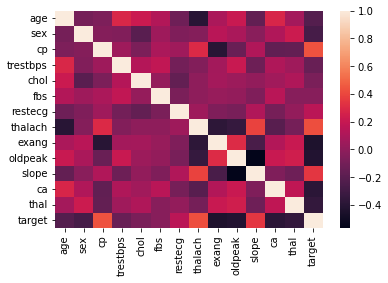

In [333]:
sns.heatmap(df.corr())

In [334]:
from sklearn.neighbors import KNeighborsClassifier
def best_case(i):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    return knn.score(X_test,y_test)

In [335]:
best=1
for i in range(1,100):
    if best_case(best)<best_case(i):
        best=i
print(best)    

23


In [336]:
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
print(knn.score(X_test,y_test))

0.819672131147541
